<a href="https://colab.research.google.com/github/ritwik4m/ipl-batting-intent-analysis/blob/main/Batting_Intent_Analysis_in_IPL_2025_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Batting Intent Analysis in IPL 2025 with Python

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("ipl_match_1473461_deliveries.csv")
df.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,extras_type,wicket_kind,player_out,fielders
0,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
1,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,0,0,NaN,NaN,NaN,NaN
2,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,0,5,5,wides,NaN,NaN,NaN
3,Royal Challengers Bengaluru,0,PD Salt,MA Starc,V Kohli,1,0,1,NaN,NaN,NaN,NaN
4,Royal Challengers Bengaluru,0,V Kohli,MA Starc,PD Salt,1,0,1,NaN,NaN,NaN,NaN


In [7]:
def categorize_phase(over):
  if over < 6:
    return 'Powerplay'
  elif 6 <= over <= 15:
   return 'Midover'
  else:
   return 'Death-overs'

In [10]:
df['phase']= df['over'].apply(categorize_phase)

In [13]:
df['phase'].value_counts()


,count
phase,
Midover,120
Powerplay,77
Death-overs,39


In [14]:
batting_phase = (
    df.groupby(['batter', 'phase'])
    .agg(
        balls_faced=('runs_batter', 'count'),
        runs=('runs_batter', 'sum'),
        fours=('runs_batter', lambda x: (x == 4).sum()),
        sixes=('runs_batter', lambda x: (x == 6).sum()),
        dots=('runs_batter', lambda x: (x == 0).sum())
    )
    .reset_index()
)


In [16]:
print(batting_phase.head())


          batter        phase  balls_faced  runs  fours  sixes  dots
0       AR Patel      Midover            6     8      1      0     2
1       AR Patel    Powerplay            5     7      1      0     1
2  Abishek Porel    Powerplay            7     7      1      0     4
3        B Kumar  Death-overs            4     1      0      0     3
4     D Padikkal    Powerplay            9     1      0      0     8


In [17]:
batting_phase['strike_rate'] = batting_phase['runs'] / batting_phase['balls_faced'] * 100
batting_phase['boundary%'] = (batting_phase['fours'] + batting_phase['sixes']) / batting_phase['balls_faced'] * 100
batting_phase['dot%'] = batting_phase['dots'] / batting_phase['balls_faced'] * 100

# Optional: create a simple "intent index" combining aggression & control
batting_phase['intent_index'] = (batting_phase['boundary%'] - batting_phase['dot%']) / 100


In [18]:
print(batting_phase.round(2))


             batter        phase  balls_faced  runs  fours  sixes  dots  \
0          AR Patel      Midover            6     8      1      0     2   
1          AR Patel    Powerplay            5     7      1      0     1   
2     Abishek Porel    Powerplay            7     7      1      0     4   
3           B Kumar  Death-overs            4     1      0      0     3   
4        D Padikkal    Powerplay            9     1      0      0     8   
5      F du Plessis    Powerplay            7     2      0      0     5   
6   J Fraser-McGurk    Powerplay            7     7      1      0     4   
7         JM Sharma      Midover           11     3      0      0     8   
8         KH Pandya  Death-overs            3     2      0      0     1   
9         KH Pandya      Midover           15    16      1      0     5   
10         KL Rahul  Death-overs            7    19      1      2     1   
11         KL Rahul      Midover           36    60      4      4    11   
12         KL Rahul    Po

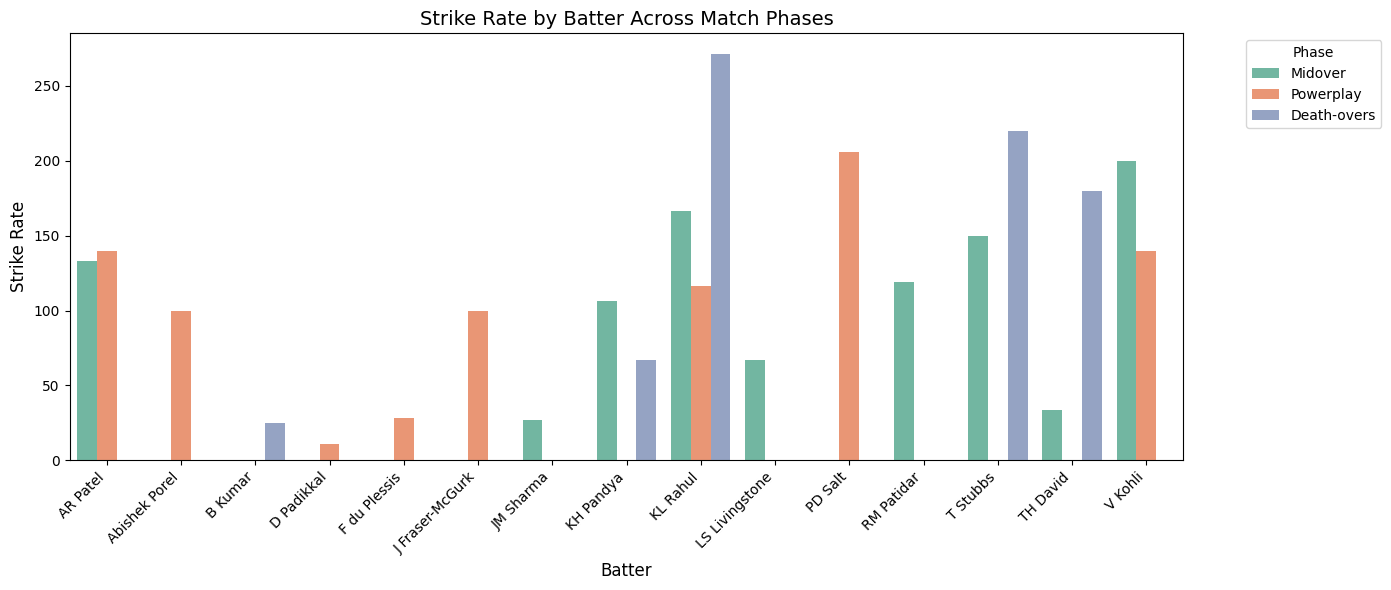

In [23]:
plt.figure(figsize=(14,6))
sns.barplot(data=batting_phase, x='batter', y='strike_rate', hue='phase', palette='Set2')

plt.title('Strike Rate by Batter Across Match Phases', fontsize=14)
plt.xlabel('Batter', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Phase', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Observation: Strike Rate by Batter Across Match Phases

- **Powerplay:** PD Salt and Abishek Porel show the highest strike rates, indicating strong attacking intent early on.  
- **Middle Overs:** Virat Kohli maintains stability, while others slow down significantly.  
- **Death Overs:** T Stubbs and KL Rahul accelerate effectively, showing strong finishing ability.  

Overall, PD Salt and Stubbs exhibit the most aggressive intent across innings phases.


In [24]:
team_phase = (
    df.groupby(['team', 'phase'])
    .agg(
        balls_faced=('runs_batter', 'count'),
        runs=('runs_batter', 'sum'),
        fours=('runs_batter', lambda x: (x == 4).sum()),
        sixes=('runs_batter', lambda x: (x == 6).sum()),
        dots=('runs_batter', lambda x: (x == 0).sum())
    )
    .reset_index()
)


In [25]:
team_phase['strike_rate'] = team_phase['runs'] / team_phase['balls_faced'] * 100
team_phase['boundary%'] = (team_phase['fours'] + team_phase['sixes']) / team_phase['balls_faced'] * 100
team_phase['dot%'] = team_phase['dots'] / team_phase['balls_faced'] * 100
team_phase['intent_index'] = (team_phase['boundary%'] - team_phase['dot%']) / 100


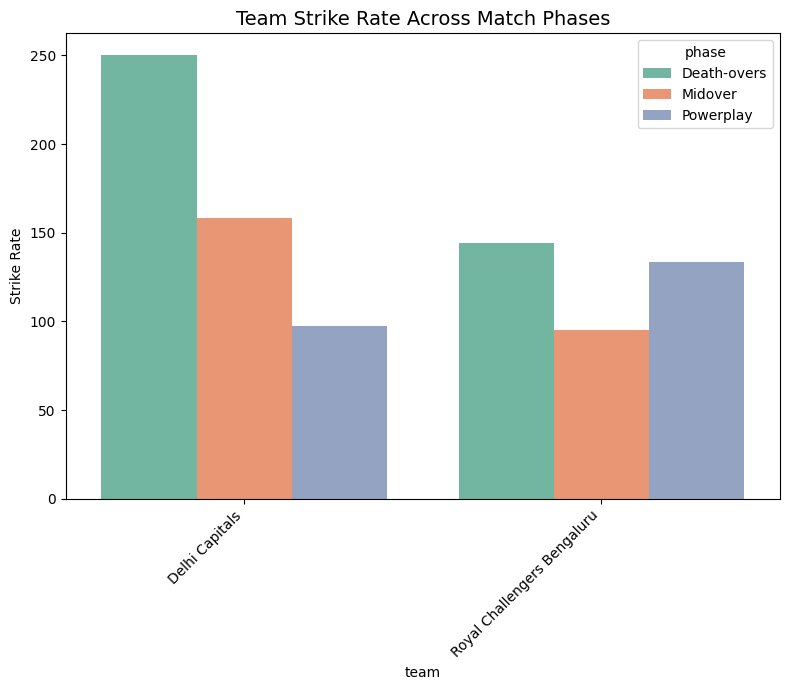

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,7))
sns.barplot(data=team_phase, x='team', y='strike_rate', hue='phase', palette='Set2')
plt.title('Team Strike Rate Across Match Phases', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Strike Rate')
plt.tight_layout()
plt.show()


### Observation: Team Strike Rate Across Match Phases

- **Delhi Capitals (DC)** demonstrate the **highest batting intent**, with a very high strike rate in the **Death Overs (≈250)**, showing aggressive finishing ability.  
- Their **Midover** performance (≈160) indicates balanced scoring, while the **Powerplay (≈100)** suggests a relatively steady start.  
  
- **Royal Challengers Bengaluru (RCB)** maintain a **more consistent strike rate** across phases, peaking slightly in the **Death Overs (≈145)** but remaining below DC in every phase.  
- Their **Powerplay (≈135)** strike rate suggests decent but not explosive starts.

**Key Insight:**  
Delhi Capitals show a clear “finish-strong” strategy, accelerating significantly toward the end of the innings.  
In contrast, Royal Challengers Bengaluru follow a more measured, steady approach without a major late-overs surge.


In [32]:
import pandas as pd

batter_summary = (
    df.groupby('batter', as_index=False)
    .agg(
        balls_faced=('runs_batter', 'count'),
        runs=('runs_batter', 'sum'),
        fours=('runs_batter', lambda x: (x == 4).sum()),
        sixes=('runs_batter', lambda x: (x == 6).sum()),
        dots=('runs_batter', lambda x: (x == 0).sum())
    )
)

batter_summary['boundary%'] = (batter_summary['fours'] + batter_summary['sixes']) / batter_summary['balls_faced'] * 100
batter_summary['dot%'] = batter_summary['dots'] / batter_summary['balls_faced'] * 100
batter_summary['strike_rate'] = batter_summary['runs'] / batter_summary['balls_faced'] * 100


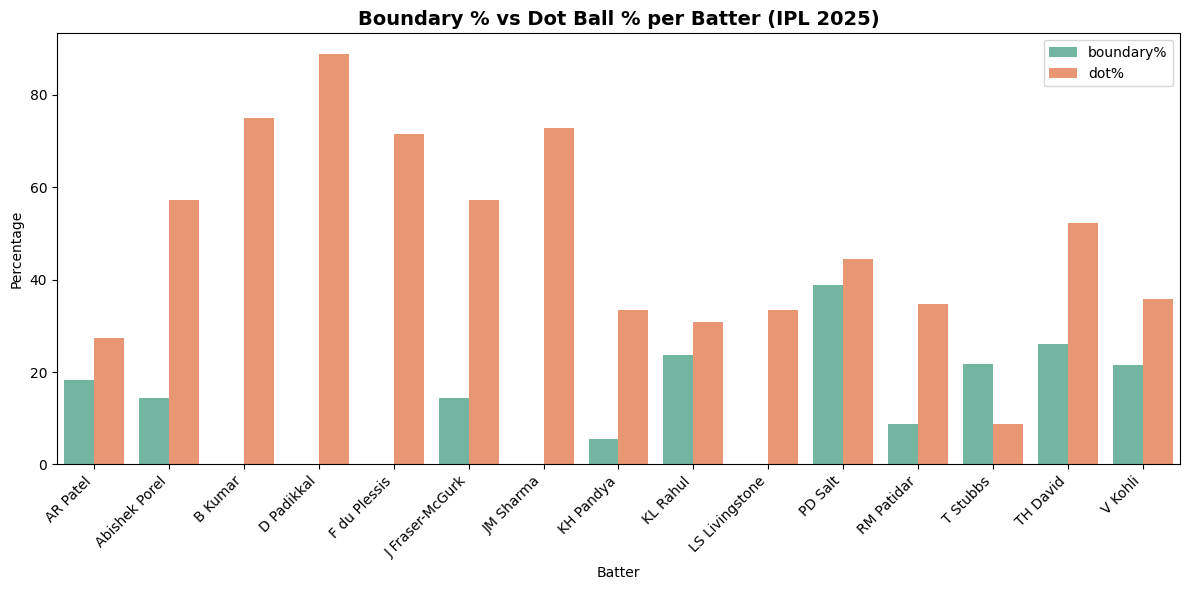

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming batter_summary already contains: batter, boundary%, dot%
plt.figure(figsize=(12,6))
batter_long = batter_summary.melt(
    id_vars='batter',
    value_vars=['boundary%', 'dot%'],
    var_name='Metric',
    value_name='Percentage'
)

sns.barplot(data=batter_long, x='batter', y='Percentage', hue='Metric', palette='Set2')
plt.title('Boundary % vs Dot Ball % per Batter (IPL 2025)', fontsize=14, weight='bold')
plt.xlabel('Batter')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='')
plt.tight_layout()
plt.show()


### Observation: Boundary % vs Dot Ball % per Batter

- **PD Salt** and **TH David** demonstrate the most attacking intent — high Boundary %, moderate to low Dot %.  
- **T Stubbs** shows efficient scoring with minimal dot balls, reflecting fluent strike rotation.  
- **Virat Kohli** and **KL Rahul** maintain balanced profiles suitable for anchoring.  
- **Padikkal** and **B Kumar** appear in the low-intent zone, with high dot-ball rates and limited boundary output.

**Key Insight:**  
Batters who consistently combine **low dot-ball percentages** with **high boundary frequencies** exhibit true batting intent — they sustain pressure on the bowlers and maintain scoring momentum throughout the innings.


In [36]:
top_batters = (
    df.groupby('batter')['runs_batter']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index.tolist()
)

In [38]:
over_progression = (
    df[df['batter'].isin(top_batters)]
    .groupby(['batter', 'over'], as_index=False)
    .agg(
        runs=('runs_batter', 'sum'),
        balls=('runs_batter', 'count'),
        fours=('runs_batter', lambda x: (x == 4).sum()),
        sixes=('runs_batter', lambda x: (x == 6).sum())
    )
)

over_progression['strike_rate'] = over_progression['runs'] / over_progression['balls'] * 100
over_progression['boundary%'] = (over_progression['fours'] + over_progression['sixes']) / over_progression['balls'] * 100


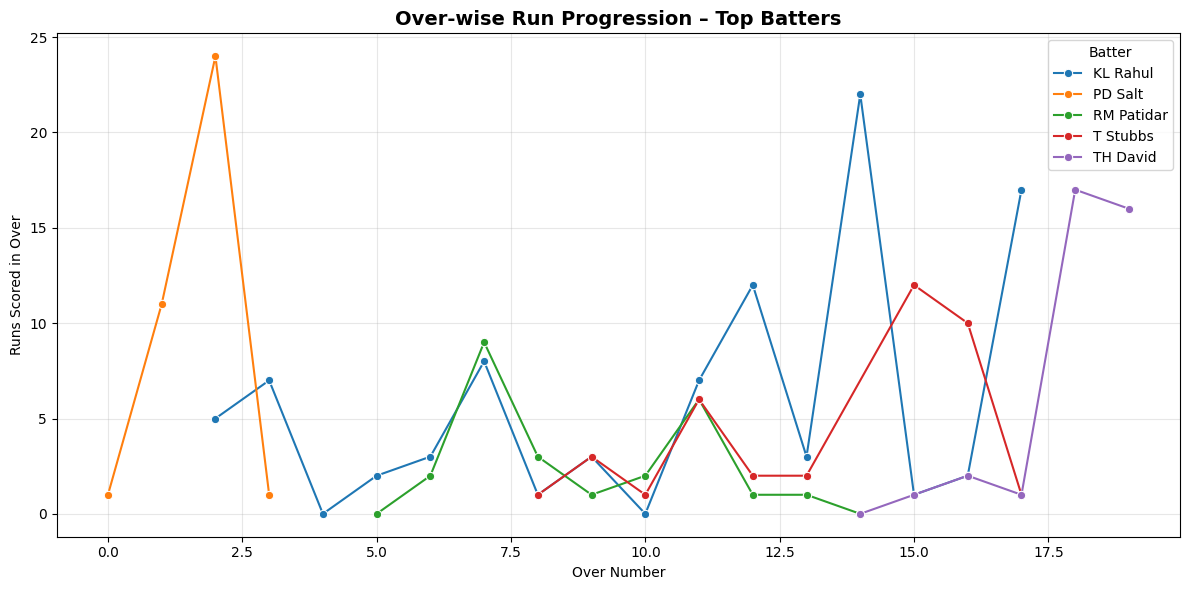

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(data=over_progression, x='over', y='runs', hue='batter', marker='o')

plt.title('Over-wise Run Progression – Top Batters', fontsize=14, weight='bold')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored in Over')
plt.grid(alpha=0.3)
plt.legend(title='Batter')
plt.tight_layout()
plt.show()


### Observation: Over-wise Run Progression – Top Batters

- **PD Salt** dominates early overs, scoring heavily in the Powerplay (overs 1–3).  
- **KL Rahul** displays a steady scoring pattern, anchoring through the middle overs.  
- **TH David** exhibits a late surge in the Death Overs, reflecting his role as a powerful finisher.  
- **T Stubbs** maintains consistency across overs, combining strike rotation with timely boundaries.  
- **RM Patidar** contributes in the middle phase but shows less acceleration toward the end.

**Key Insight:**  
Batters demonstrate distinct progression profiles — explosive openers (Salt), steady anchors (Rahul, Patidar), and finishers (Stubbs, David).  
This highlights how balanced batting line-ups rely on diverse scoring roles across phases.


In [46]:
import pandas as pd

# Calculate per batter
batter_profile = (
    df.groupby('batter', as_index=False)
    .agg(
        balls_faced=('runs_batter', 'count'),
        dot_balls=('runs_batter', lambda x: (x == 0).sum()),
        boundary_balls=('runs_batter', lambda x: ((x == 4) | (x == 6)).sum()),
        strike_rotation_balls=('runs_batter', lambda x: ((x >= 1) & (x <= 3)).sum())
    )
)

# Compute percentages
batter_profile['dot%'] = batter_profile['dot_balls'] / batter_profile['balls_faced'] * 100
batter_profile['strike%'] = batter_profile['strike_rotation_balls'] / batter_profile['balls_faced'] * 100
batter_profile['boundary%'] = batter_profile['boundary_balls'] / batter_profile['balls_faced'] * 100

# Optional: rounding
batter_profile = batter_profile.round({'dot%':1, 'strike%':1, 'boundary%':1})

batter_profile.head()


,batter,balls_faced,dot_balls,boundary_balls,strike_rotation_balls,dot%,strike%,boundary%
0,AR Patel,11,3,2,6,27.3,54.5,18.2
1,Abishek Porel,7,4,1,2,57.1,28.6,14.3
2,B Kumar,4,3,0,1,75.0,25.0,0.0
3,D Padikkal,9,8,0,1,88.9,11.1,0.0
4,F du Plessis,7,5,0,2,71.4,28.6,0.0


In [52]:
top5 = (
    df.groupby('batter')['runs_batter']
    .sum()
    .nlargest(4)
    .index.tolist()
)

top5_profile = batter_profile[batter_profile['batter'].isin(top5)]


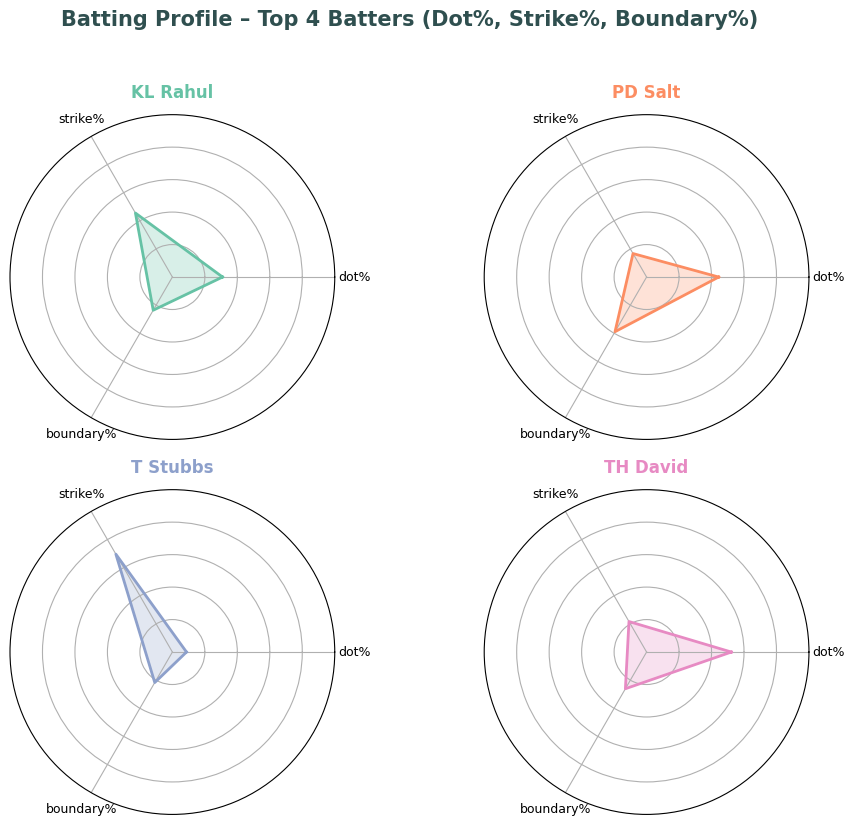

In [58]:
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns  # for nice color palettes

# Categories for radar axes
categories = ['dot%', 'strike%', 'boundary%']
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Select 4 batters (for 2x2 grid)
top4_profile = top5_profile.head(4)

# Choose a colorful palette
colors = sns.color_palette("Set2", n_colors=len(top4_profile))

# Create 2x2 radar chart layout
fig, axes = plt.subplots(2, 2, subplot_kw=dict(polar=True), figsize=(10, 8))
axes = axes.flatten()

# Plot each batter
for i, (idx, row) in enumerate(top4_profile.iterrows()):
    values = row[categories].tolist()
    values += values[:1]

    ax = axes[i]
    ax.plot(angles, values, color=colors[i], linewidth=2)
    ax.fill(angles, values, color=colors[i], alpha=0.25)

    # Radar axis setup
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=9)
    ax.set_ylim(0, 100)
    ax.set_yticks([20, 40, 60, 80])
    ax.set_yticklabels([])

    # Title per player
    ax.set_title(row['batter'], fontsize=12, weight='bold', pad=12, color=colors[i])

# Hide any empty subplots (if fewer players)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Add overall title
plt.suptitle('Batting Profile – Top 4 Batters (Dot%, Strike%, Boundary%)', fontsize=15, weight='bold', color='darkslategray', y=1.03)
plt.tight_layout()
plt.show()


### Observation: Batting Profiles – Top 4 Batters (Dot%, Strike%, Boundary%)

- **PD Salt** demonstrates aggressive Powerplay intent, combining low dot% with high boundary%.  
- **T Stubbs** excels in strike rotation, sustaining innings momentum.  
- **TH David** exhibits finisher traits — higher dot% early but strong boundary surge.  
- **KL Rahul** balances rotation and defense, functioning as an anchor.

**Key Insight:**  
Radar charts highlight the diversity of batting roles — openers set the tone, anchors stabilize, and finishers close with aggression. Together, these contrasting profiles create a balanced batting lineup.


By examining strike rates, boundary and dot-ball percentages, over-wise run patterns, and wicket impacts, this analysis decodes how each player approached different match phases. From aggressive Powerplay openers like PD Salt to high-impact finishers such as T Stubbs and TH David, and steady anchors like KL Rahul, the data reveals distinct batting styles that together define a team’s overall intent.